In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
def wrap(frame):
    new_frame = frame.copy()
    new_frame[new_frame >= 1] -= 1
    new_frame[new_frame < 0] += 1
    return new_frame

In [124]:
def convert(traj, latt):
    return np.einsum('ijk,kl->ijl', traj, latt)

In [125]:
a = 1
b = 1
alpha = 90 * np.pi/180

params = [a, b, alpha]

latt = np.array([[a, 0],[b*np.cos(alpha), b*np.sin(alpha)]])
latt

array([[1.000000e+00, 0.000000e+00],
       [6.123234e-17, 1.000000e+00]])

In [126]:
frac_box = np.array([[[0,0],[1,0],[1,1],[0,1],[0,0]]])
cart_box = convert(frac_box, latt)

frac_box = frac_box.squeeze()
cart_box = cart_box.squeeze()

In [127]:
start = [0.5, 0.5]

traj = []

for i in range(3):
    if i == 0:
        traj.append([start])
    else:
        traj.append(wrap(traj[-1] + (np.random.random(size=(2)) - 0.5)))

traj = np.array(traj)
print(traj)

[[[0.5        0.5       ]]

 [[0.20223258 0.30674075]]

 [[0.47098823 0.992629  ]]]


The above cell is not used but is left for random testing in the future.

The example in the following cell only works for an orthorhombic cell. For a triclinic cell the 'moves' array will need to be modified.
Since this is just an example this does not matter but in the future agreement between the periodic images method and the 'new method' should be enough.

In [128]:
traj = np.array([[[.1,.1]],[[.9,.1]],[[.9,.9]],[[.1,.9]],[[.9,.1]],[[.5,.5]],[[.5,.9]],[[.5,.1]],[[.9,.5]],[[.1,.5]],[[.1,.1]]])
moves =np.array([[[0,0]]  ,[[-1,0]] ,[[0,-1]] ,[[1,0]]  ,[[-1,1]] ,[[0,0]]  ,[[0,0]]  ,[[0,1]]  ,[[0,0]]  ,[[1,0]]  ,[[0,0]]])

print(traj.shape, moves.shape)
traj = np.concatenate((traj,traj), axis=0)
moves = np.concatenate((moves,moves), axis=0)
print(traj.shape, moves.shape)
traj = np.concatenate((traj,traj), axis=1)
moves = np.concatenate((moves,moves), axis=1)
print(traj.shape, moves.shape)
traj = np.concatenate((traj,traj), axis=1)
moves = np.concatenate((moves,moves), axis=1)
print(traj.shape, moves.shape)

p_images = np.cumsum(moves,axis=0)

(11, 1, 2) (11, 1, 2)
(22, 1, 2) (22, 1, 2)
(22, 2, 2) (22, 2, 2)
(22, 4, 2) (22, 4, 2)


(-0.1, 1.05)

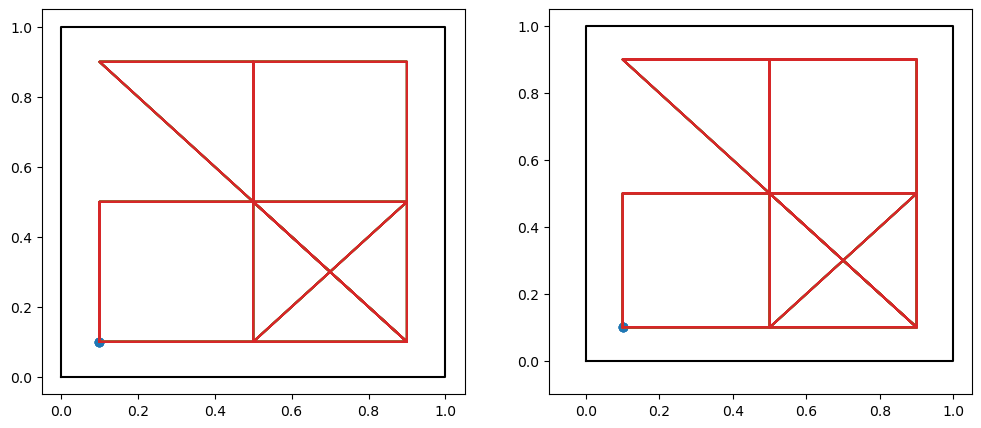

In [129]:
frac_traj = traj.copy()
cart_traj = convert(frac_traj, latt)

fig, axs = plt.subplots(1,2, figsize=(12,5))

frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_traj[0,:,0],frac_traj[0,:,1])
frac.plot(frac_traj[:,:,0],frac_traj[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_traj[0,:,0],cart_traj[0,:,1])
cart.plot(cart_traj[:,:,0],cart_traj[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

In [130]:
frac_vectors = np.diff(frac_traj, axis=0)
cart_vectors = np.diff(cart_traj, axis=0)

(-1.1, 1.1)

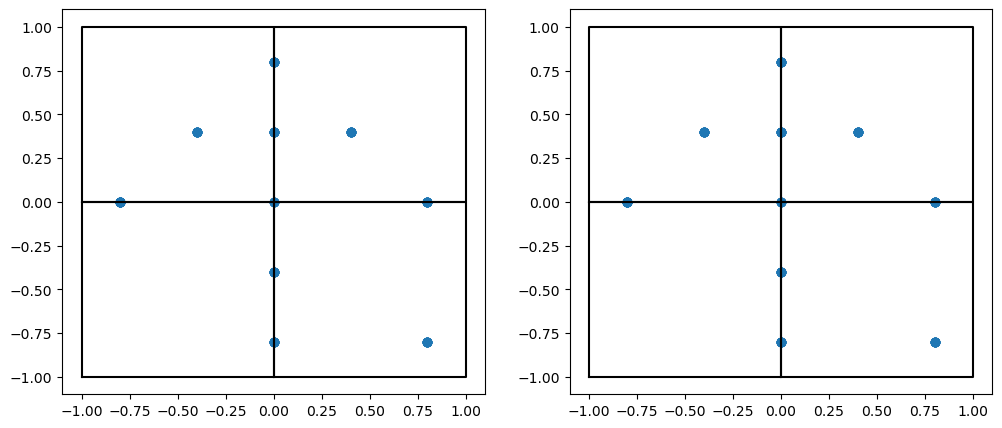

In [131]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.plot(frac_box[:,0]-1,frac_box[:,1], color='black')
frac.plot(frac_box[:,0]-1,frac_box[:,1]-1, color='black')
frac.plot(frac_box[:,0],frac_box[:,1]-1, color='black')
frac.scatter(frac_vectors[:,:,0], frac_vectors[:,:,1])

frac.set_ylim(-1.1, 1.1)
frac.set_xlim(-1.1, 1.1)


cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.plot(cart_box[:,0]-a,cart_box[:,1], color='black')
cart.plot(cart_box[:,0]-a-(b*np.cos(alpha)),cart_box[:,1]-(b*np.sin(alpha)), color='black')
cart.plot(cart_box[:,0]-(b*np.cos(alpha)),cart_box[:,1]-(b*np.sin(alpha)), color='black')
cart.scatter(cart_vectors[:,:,0], cart_vectors[:,:,1])


cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(cart_lims.min(), cart_lims.max())
cart.set_xlim(cart_lims.min(), cart_lims.max())

In [132]:
def plot_axis(frac_axis, cart_axis, frac_box, cart_box, a, b, alpha, aoffset=0, boffset=0):
    frac_offset = [aoffset, boffset]
    cart_offset = [a*aoffset + b*boffset*np.cos(alpha), b*boffset*np.sin(alpha)]

    fb = frac_box.copy() + frac_offset
    cb = cart_box.copy() + cart_offset
    
    frac_axis.plot(fb[:,0],fb[:,1], color='black', zorder=10)
    cart_axis.plot(cb[:,0],cb[:,1], color='black', zorder=10)

    frac_axis.plot(fb[[0,2],0], fb[[0,2],1], color='orange')
    frac_axis.plot(fb[[1,3],0], fb[[1,3],1], color='orange')

    cart_axis.plot(cb[[0,2],0], cb[[0,2],1], color='orange')
    cart_axis.plot(cb[[1,3],0], cb[[1,3],1], color='orange')

    frac_halfs = np.array([[0.5,0],[1,0.5],[0.5,1],[0,0.5]]) + frac_offset
    cart_halfs = np.array([np.dot(x, latt) for x in frac_halfs])

    m = cart_box[2,1] / cart_box[2,0]
    beta = np.arctan(m)
    gamma = alpha - beta
    x_1 = (b * np.cos(beta)) / (2 * np.cos(gamma))
    y_1 = m*x_1
    cart_cross_point = np.array([x_1, y_1]) + cart_offset

    cart_axis.plot([cart_halfs[-1,0], cart_cross_point[0]],[cart_halfs[-1,1], cart_cross_point[1]], zorder=-2, color='blue')
    cart_axis.plot([cart_halfs[ 0,0], cart_cross_point[0]],[cart_halfs[ 0,1], cart_cross_point[1]], zorder=-2, color='blue')

    frac_cross_point = np.dot(cart_cross_point, np.linalg.inv(latt))
    frac_axis.plot([frac_halfs[-1,0], frac_cross_point[0]],[frac_halfs[-1,1],frac_cross_point[1]], zorder=-2, color='blue')
    frac_axis.plot([frac_halfs[ 0,0], frac_cross_point[0]],[frac_halfs[0,1],  frac_cross_point[1]], zorder=-2, color='blue')

    cart_cross_point_reflected = cart_box[2] - np.array([x_1, y_1]) + cart_offset
    cart_axis.plot([cart_halfs[1,0],cart_cross_point_reflected[0]],[cart_halfs[1,1],cart_cross_point_reflected[1]], zorder=-2, color='blue')
    cart_axis.plot([cart_halfs[2,0],cart_cross_point_reflected[0]],[cart_halfs[2,1],cart_cross_point_reflected[1]], zorder=-2, color='blue')

    frac_cross_point_reflected =  np.dot(cart_cross_point_reflected, np.linalg.inv(latt))
    frac_axis.plot([frac_halfs[1,0],frac_cross_point_reflected[0]],[frac_halfs[1,1],frac_cross_point_reflected[1]], zorder=-2, color='blue')
    frac_axis.plot([frac_halfs[2,0],frac_cross_point_reflected[0]],[frac_halfs[2,1],frac_cross_point_reflected[1]], zorder=-2, color='blue')

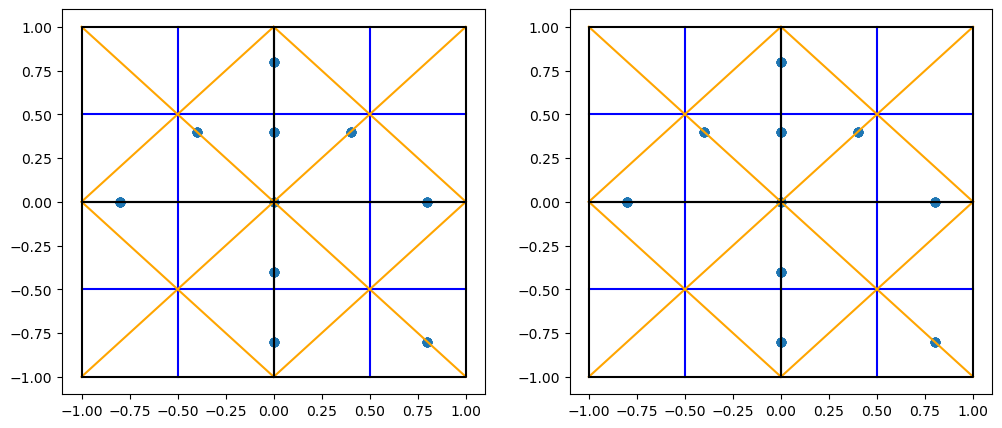

In [133]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

plot_axis(axs[0], axs[1], frac_box, cart_box, a, b, alpha)
plot_axis(axs[0], axs[1], frac_box, cart_box, a, b, alpha, aoffset=-1)
plot_axis(axs[0], axs[1], frac_box, cart_box, a, b, alpha, aoffset=-1, boffset=-1)
plot_axis(axs[0], axs[1], frac_box, cart_box, a, b, alpha, boffset=-1)

cart_lims = np.array([axs[1].get_xlim(),axs[1].get_ylim()]).flatten()
axs[1].set_ylim(cart_lims.min(), cart_lims.max())
axs[1].set_xlim(cart_lims.min(), cart_lims.max())

axs[0].scatter(frac_vectors[:,:,0], frac_vectors[:,:,1])
axs[1].scatter(cart_vectors[:,:,0], cart_vectors[:,:,1])

In [134]:
def unwrap_by_check_all_images(traj, latt):
    trial_images = np.array([[-1, 1],[0, 1],[1, 1],
                             [-1, 0],[0, 0],[1, 0],
                             [-1,-1],[0,-1],[1,-1]])

    unwrapped = [traj[0]]
    for f_i, frame in enumerate(traj):
        if f_i == 0:
            continue
        unwrapped.append([])
        for a_i, atom in enumerate(frame):
            frac_images = trial_images + atom
            cart_images = [np.array(x @ latt) for x in frac_images]

            frac_previous_frame = traj[f_i-1][a_i]
            cart_previous_frame = frac_previous_frame @ latt

            image_disps = np.linalg.norm(cart_images - cart_previous_frame, axis=-1)
            min_image = np.argmin(image_disps)

            unwrapped[-1].append(unwrapped[-2][a_i] + (frac_images[min_image] - frac_previous_frame))
    
    unwrapped = np.array(unwrapped) 
    return unwrapped

In [135]:
p_unwrapped = unwrap_by_check_all_images(traj, latt)
np.all(np.floor(p_unwrapped) == p_images)

True

In [136]:
def unwrap_by_new_method(traj, a, b, alpha, latt):
    cart_box_corner = np.array([a + b*np.cos(alpha), b*np.sin(alpha)])
    m = cart_box_corner[1] / cart_box_corner[0]
    beta = np.arctan(m)
    gamma = alpha - beta
    
    crosspoint_x = (b * np.cos(beta)) / (2 * np.cos(gamma))
    crosspoint_y = m * crosspoint_x
    crosspoint = np.array([crosspoint_x, crosspoint_y])

    frac_crosspoint = crosspoint @ np.linalg.inv(latt)
    frac_reflected_crosspoint = [1,1] - frac_crosspoint
    frac_halves = [[.5,0],[1,.5],[.5,1],[0,.5]]

    frac_crosspoint_m1 = (frac_crosspoint[1] - frac_halves[0][1]) / (frac_crosspoint[0] - frac_halves[0][0])
    frac_crosspoint_m2 = (frac_crosspoint[1] - frac_halves[-1][1]) / (frac_crosspoint[0] - frac_halves[-1][0])

    unwrapped = [traj[0]]
    for f_i, frame in enumerate(traj):
        if f_i == 0:
            continue
        unwrapped.append([])
        for a_i, atom in enumerate(frame):
            previous_frame = traj[f_i-1][a_i]
            disp_vector = atom - previous_frame
            
            wrap_vector = -(disp_vector < 0).astype(int)
            wrapped_disp_vector = disp_vector - wrap_vector

            x, y = wrapped_disp_vector
            if y < x:
                if y < -x + 1:
                    if y < frac_crosspoint_m1*(x - frac_crosspoint[0]) + frac_crosspoint[1]:
                        new_method_wrap_vector = [0,0]
                    else:
                        new_method_wrap_vector = [1,0]
                else:
                    if y < frac_crosspoint_m2*(x - frac_reflected_crosspoint[0]) + frac_crosspoint[1]:
                        new_method_wrap_vector = [1,0]
                    else:
                        new_method_wrap_vector = [1,1]
            else:
                if y > -x + 1:
                    if y > frac_crosspoint_m1*(x - frac_reflected_crosspoint[0]) + frac_crosspoint[1]:
                        new_method_wrap_vector = [1,1]
                    else:
                        new_method_wrap_vector = [0,1]
                else:
                    if y > frac_crosspoint_m2*(x - frac_crosspoint[0]) + frac_crosspoint[1]:
                        new_method_wrap_vector = [0,1]
                    else:
                        new_method_wrap_vector = [0,0]
            
            unwrapped_atom = unwrapped[-2][a_i] + (disp_vector - wrap_vector - new_method_wrap_vector)
            unwrapped[-1].append(unwrapped_atom)

            #if np.all(atom == [0.5,0.5]):
            #    print(atom,previous_frame,unwrapped[-2][a_i],disp_vector,wrapped_disp_vector,wrap_vector,new_method_wrap_vector)
    
    unwrapped = np.array(unwrapped)
    return unwrapped

In [137]:
new_unwrapped = unwrap_by_new_method(traj,a,b,alpha,latt)
np.all(np.floor(new_unwrapped) == p_images)

True